In [91]:
import os
import pickle5
import pandas as pd
import numpy as np

from dotenv import load_dotenv
from itertools import repeat

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py

import plotly.express as px

from plotly.offline import init_notebook_mode, plot_mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from ase.visualize import view
from ase.visualize.plot import plot_atoms


In [51]:
#load_dotenv('.env')
#PLOTLY_API_KEY = os.getenv('PLOTLY_API_KEY')

#py.sign_in('gwanyeong', PLOTLY_API_KEY)

In [52]:
with open('../results_nurion/bulk_analysis/df_bulk_v2.pkl', 'rb') as f:
    data = pickle5.load(f)
# print(data)
df_bulk = pd.DataFrame(data)
df_bulk

,MP_ID,formula,PREC,ALGO,ISPIN,IMIX,NELM,IBRION,EDIFF,NSW,...,Volume_ref,Volume,Err_V_percent,Theoretical,VBM,E_fermi,CBM,bgtype,bgpath,structure
1,mp-12631,SrTcO3,Accurate,Fast,2,4,100,2,2e-06,200,...,63.1491,62.1201,1.62938,False,None,7.15536,None,Indirect,None,"[[0. 0. 0.] Sr, [1.98022307 1.98022307 1.98022..."
2,mp-19035,BaFeO3,Accurate,Fast,2,4,100,2,0.0001,200,...,65.5993,65.5993,0,False,None,3.27322,None,Indirect,None,"[[2.0165225 2.0165225 2.0165225] Ba, [0. 0. 0...."
3,mp-19322,BaMoO3,Accurate,Fast,2,4,100,2,0.0001,200,...,71.4286,70.764,0.930459,False,None,5.68616,None,Indirect,None,"[[2.06811213 2.06811213 2.06811213] Ba, [0. 0...."
4,mp-3614,KTaO3,Accurate,Fast,2,4,100,2,2e-06,200,...,65.4917,65.3762,0.176445,False,1.5991,1.84427,3.7071,Indirect,R-gamma,"[[2.01423343 2.01423343 2.01423343] K, [0. 0. ..."
5,mp-3834,BaZrO3,Accurate,Fast,2,4,100,2,1e-07,99,...,77.0743,76.0138,1.37593,False,3.5638,3.90525,6.683,Indirect,R-gamma,"[[0. 0. 0.] Ba, [2.11804015 2.11804015 2.11804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,mp-976848,NiRuO3,Accurate,Fast,2,4,100,2,0.00025,99,...,51.3811,52.3173,-1.82207,True,None,5.76039,None,Indirect,None,"[[0. 0. 0.] Ni, [1.87004381 1.87004381 1.87004..."
344,mp-972296,ZrOsO3,Accurate,Fast,2,4,100,2,0.00025,99,...,60.5275,60.408,0.197536,True,None,8.64263,None,Indirect,None,"[[0. 0. 0.] Zr, [1.9618605 1.9618605 1.9618605..."
345,mp-1183277,BPtO3,Accurate,Fast,2,4,100,2,0.00025,99,...,40.9646,40.9646,0,True,None,8.12442,None,Indirect,None,"[[1.723612 1.723612 1.723612] B, [0. 0. 0.] Pt..."
346,mp-1183221,BIrO3,Accurate,Fast,2,4,100,2,0.00025,99,...,39.8497,39.8497,0,True,None,7.89611,None,Indirect,None,"[[1.707831 1.707831 1.707831] B, [0. 0. 0.] Ir..."


In [53]:
df_bulk[10:20]

,MP_ID,formula,PREC,ALGO,ISPIN,IMIX,NELM,IBRION,EDIFF,NSW,...,Volume_ref,Volume,Err_V_percent,Theoretical,VBM,E_fermi,CBM,bgtype,bgpath,structure
11,mp-1076711,SrCuO3,Accurate,Fast,2,4,100,2,0.00025,99,...,58.6149,58.6149,0,True,None,2.82001,None,Indirect,None,"[[1.942254 1.942254 1.942254] Sr, [0. 0. 0.] C..."
12,mp-935811,KNbO3,Accurate,Fast,2,4,100,2,0.00025,99,...,66.7983,66.7983,0,False,1.3146,1.59896,2.7348,Indirect,R-gamma,"[[0. 0. 0.] K, [2.0287345 2.0287345 2.0287345]..."
13,mp-4170,NaTaO3,Accurate,Fast,2,4,100,2,0.00025,99,...,63.1923,63.0588,0.211199,False,1.6745,1.9711,3.9445,Indirect,R-gamma,"[[1.99014747 1.99014747 1.99014747] Na, [0. 0...."
14,mp-1183289,BaScO3,Accurate,Fast,2,4,100,2,0.00025,99,...,75.1353,75.1353,0,True,None,1.96453,None,Indirect,None,"[[0. 0. 0.] Ba, [2.1098485 2.1098485 2.1098485..."
15,mp-1178510,BaPdO3,Accurate,Fast,2,4,100,2,0.00025,99,...,70.3564,69.2123,1.62612,True,None,3.63341,None,Indirect,None,"[[0. 0. 0.] Ba, [2.0528839 2.0528839 2.0528839..."
16,mp-754678,BaTaO3,Accurate,Fast,2,4,100,2,0.00025,99,...,70.4883,70.4883,0,True,None,5.50443,None,Indirect,None,"[[0. 0. 0.] Ba, [2.065423 2.065423 2.065423] T..."
17,mp-4551,SrHfO3,Accurate,Fast,2,4,100,2,2e-06,200,...,71.02,70.885,0.190091,False,2.349,2.60374,6.0885,Indirect,R-gamma,"[[2.06929016 2.06929016 2.06929016] Sr, [0. 0...."
18,mp-1040464,NaOsO3,Accurate,Fast,2,4,100,2,0.00025,99,...,58.261,58.261,0,True,None,4.67687,None,Indirect,None,"[[1.938337 1.938337 1.938337] Na, [0. 0. 0.] O..."
19,mp-1187623,TlTcO3,Accurate,Fast,2,4,100,2,0.00025,99,...,63.5568,62.5919,1.51816,True,None,7.00791,None,Indirect,None,"[[0. 0. 0.] Tl, [1.9852238 1.9852238 1.9852238..."
20,mp-973471,KReO3,Accurate,Fast,2,4,100,2,0.00025,99,...,61.1191,61.1337,-0.0237738,True,None,4.13512,None,Indirect,None,"[[0. 0. 0.] K, [1.96968506 1.96968506 1.969685..."


In [54]:
for i in range(1, len(df_bulk)+1):
    print(i," ",df_bulk['formula'][i]," ",df_bulk['Ehull_ref'][i])

1   SrTcO3   0.0
2   BaFeO3   0.0
3   BaMoO3   0.0
4   KTaO3   0.0
5   BaZrO3   0.0
6   SrFeO3   0.0
7   KTcO3   0.0
8   NaTcO3   0.0
9   BaHfO3   0.0
10   SrTiO3   0.000882217999999213
11   SrCuO3   0.00956816487500145
12   KNbO3   0.01291293400000093
13   NaTaO3   0.014601897500000405
14   BaScO3   0.023880135000009517
15   BaPdO3   0.025886658499997495
16   BaTaO3   0.03218881880000701
17   SrHfO3   0.032961875000001584
18   NaOsO3   0.035054968499995454
19   TlTcO3   0.035974791958333974
20   KReO3   0.03723231714285813
21   SrRuO3   0.037396135500003425
22   KHfO3   0.03788947374999907
23   SrVO3   0.038067433000017914
24   KOsO3   0.03861854957142263
25   TaAgO3   0.039203620000010986
26   SrNiO3   0.04032233000000218
27   RbIrO3   0.041484064000001375
28   NaReO3   0.04177487160000393
29   SrMnO3   0.04924734949999987
30   CaFeO3   0.052160963499999546
31   SrZrO3   0.05508322750000261
32   NaWO3   0.055926283695656664
33   RbTaO3   0.05665698099999972
34   SrCoO3   0.0586556319

In [55]:
with open('../results_nurion/adsorbate_analysis/df_summary_001_080.pkl', 'rb') as f:
    data = pickle5.load(f)
# print(data)
df = pd.DataFrame(data)
df

,formula,convg_bare,tot_E_bare,DE_bare,DG_bare,bare_mag,nsteps_bare,struc_bare,time_bare,convg_OOH,...,time_O,convg_OH,tot_E_OH,DE_OH,DG_OH,OH_mag,OH_dmag,nsteps_OH,struc_OH,time_OH
1,SrTcO3,True,-386.83,0,0,13.642,1,"(Atom('O', [0.0, 1.9802230716140743, 0.0], ind...",NaN,True,...,NaN,True,-398.741,-1.077,-0.782,10.772,-2.871,104,"(Atom('H', [1.0892480305002905, 2.121999850428...",NaN
2,BaFeO3,True,-316.788,0,0,59.992,1,"(Atom('Ba', [2.0165225, 2.0165225, 2.016522500...",NaN,True,...,NaN,True,-325.893,1.729,2.024,58.79,-1.202,135,"(Atom('Ba', [2.0165225, 2.0165225, 2.016522500...",NaN
3,BaMoO3,True,-359.32,0,0,24,1,"(Atom('Ba', [2.068112131752645, 2.068112131752...",NaN,True,...,NaN,True,-370.751,-0.597,-0.302,23,-1,74,"(Atom('Ba', [2.068112131752645, 2.068112131752...",NaN
4,KTaO3,True,-438.376,0,0,0,1,"(Atom('K', [2.0142334299130127, 2.014233429913...",NaN,True,...,NaN,True,-450.506,-1.296,-1.001,0.991,0.991,67,"(Atom('H', [7.210961006482538, 0.3876880866794...",NaN
5,BaZrO3,True,-438.828,0,0,0,1,"(Atom('Ba', [0.0, 0.0, 2.1180401493166494], in...",NaN,True,...,NaN,True,-448.668,0.995,1.29,0.216,0.216,112,"(Atom('Ba', [0.0, 0.0, 2.1180401493166494], in...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,RbPdO3,True,-237.862,0,0,24.444,1,"(Atom('O', [0.0, 2.0524346218557206, 0.0], ind...",NaN,True,...,NaN,True,-247.677,1.018,1.313,22,-2.444,126,"(Atom('H', [0.0821995338326523, 7.297433342242...",NaN
77,CaHfO3,True,-456.965,0,0,-0,1,"(Atom('Ca', [0.0, 0.0, 2.0506531016495875], in...",NaN,True,...,NaN,True,-467.476,0.324,0.619,0.059,0.059,148,"(Atom('Ca', [0.0, 0.0, 2.0506531016495875], in...",NaN
78,TlWO3,True,-326.169,0,0,16,26,"(Atom('O', [2.038601, 0.0, 0.0], index=0), Ato...",NaN,True,...,NaN,True,-338.705,-1.702,-1.407,15,-1,130,"(Atom('H', [2.062612090473963, 1.1374187334629...",NaN
79,RbWO3,True,-331.043,0,0,16,1,"(Atom('O', [0.0, 0.0, 2.0315109771722537], ind...",NaN,True,...,NaN,True,-343.287,-1.41,-1.115,15,-1,78,"(Atom('H', [8.064942298376518, 7.2979955850986...",NaN


In [92]:
df['Ehull'] = df_bulk['Ehull_ref'][:80]

In [93]:
df['mag_ini'] = 'FM'
df.columns.values

array(['formula', 'convg_bare', 'tot_E_bare', 'DE_bare', 'DG_bare',
       'bare_mag', 'nsteps_bare', 'struc_bare', 'time_bare', 'convg_OOH',
       'tot_E_OOH', 'DE_OOH', 'DG_OOH', 'OOH_mag', 'OOH_dmag',
       'nsteps_OOH', 'struc_OOH', 'time_OOH', 'convg_O', 'tot_E_O',
       'DE_O', 'DG_O', 'O_mag', 'O_dmag', 'nsteps_O', 'struc_O', 'time_O',
       'convg_OH', 'tot_E_OH', 'DE_OH', 'DG_OH', 'OH_mag', 'OH_dmag',
       'nsteps_OH', 'struc_OH', 'time_OH', 'Ehull', 'mag_ini'],
      dtype=object)

In [94]:
columns = ['formula', 'mag_ini','Ehull',
           'convg_bare', 'tot_E_bare', 'DE_bare', 'DG_bare','bare_mag', 'nsteps_bare', 'struc_bare',
           'convg_OOH', 'tot_E_OOH', 'DE_OOH', 'DG_OOH', 'OOH_mag', 'OOH_dmag','nsteps_OOH', 'struc_OOH',
           'convg_O', 'tot_E_O', 'DE_O', 'DG_O', 'O_mag', 'O_dmag', 'nsteps_O', 'struc_O', 
           'convg_OH', 'tot_E_OH', 'DE_OH', 'DG_OH', 'OH_mag', 'OH_dmag','nsteps_OH', 'struc_OH', ]
df = df[columns]
df

,formula,mag_ini,Ehull,convg_bare,tot_E_bare,DE_bare,DG_bare,bare_mag,nsteps_bare,struc_bare,...,nsteps_O,struc_O,convg_OH,tot_E_OH,DE_OH,DG_OH,OH_mag,OH_dmag,nsteps_OH,struc_OH
1,SrTcO3,FM,0,True,-386.83,0,0,13.642,1,"(Atom('O', [0.0, 1.9802230716140743, 0.0], ind...",...,33,"(Atom('O', [0.0, 1.9802230716140743, 0.0], ind...",True,-398.741,-1.077,-0.782,10.772,-2.871,104,"(Atom('H', [1.0892480305002905, 2.121999850428..."
2,BaFeO3,FM,0,True,-316.788,0,0,59.992,1,"(Atom('Ba', [2.0165225, 2.0165225, 2.016522500...",...,22,"(Atom('Ba', [2.0165225, 2.0165225, 2.016522500...",True,-325.893,1.729,2.024,58.79,-1.202,135,"(Atom('Ba', [2.0165225, 2.0165225, 2.016522500..."
3,BaMoO3,FM,0,True,-359.32,0,0,24,1,"(Atom('Ba', [2.068112131752645, 2.068112131752...",...,42,"(Atom('Ba', [2.068112131752645, 2.068112131752...",True,-370.751,-0.597,-0.302,23,-1,74,"(Atom('Ba', [2.068112131752645, 2.068112131752..."
4,KTaO3,FM,0,True,-438.376,0,0,0,1,"(Atom('K', [2.0142334299130127, 2.014233429913...",...,57,"(Atom('K', [2.0142334299130127, 2.014233429913...",True,-450.506,-1.296,-1.001,0.991,0.991,67,"(Atom('H', [7.210961006482538, 0.3876880866794..."
5,BaZrO3,FM,0,True,-438.828,0,0,0,1,"(Atom('Ba', [0.0, 0.0, 2.1180401493166494], in...",...,21,"(Atom('Ba', [0.0, 0.0, 2.1180401493166494], in...",True,-448.668,0.995,1.29,0.216,0.216,112,"(Atom('Ba', [0.0, 0.0, 2.1180401493166494], in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,RbPdO3,FM,0.152772,True,-237.862,0,0,24.444,1,"(Atom('O', [0.0, 2.0524346218557206, 0.0], ind...",...,59,"(Atom('O', [0.0, 2.0524346218557206, 0.0], ind...",True,-247.677,1.018,1.313,22,-2.444,126,"(Atom('H', [0.0821995338326523, 7.297433342242..."
77,CaHfO3,FM,0.154311,True,-456.965,0,0,-0,1,"(Atom('Ca', [0.0, 0.0, 2.0506531016495875], in...",...,34,"(Atom('Ca', [0.0, 0.0, 2.0506531016495875], in...",True,-467.476,0.324,0.619,0.059,0.059,148,"(Atom('Ca', [0.0, 0.0, 2.0506531016495875], in..."
78,TlWO3,FM,0.15493,True,-326.169,0,0,16,26,"(Atom('O', [2.038601, 0.0, 0.0], index=0), Ato...",...,30,"(Atom('O', [2.038601, 0.0, 0.0], index=0), Ato...",True,-338.705,-1.702,-1.407,15,-1,130,"(Atom('H', [2.062612090473963, 1.1374187334629..."
79,RbWO3,FM,0.155861,True,-331.043,0,0,16,1,"(Atom('O', [0.0, 0.0, 2.0315109771722537], ind...",...,62,"(Atom('O', [0.0, 0.0, 2.0315109771722537], ind...",True,-343.287,-1.41,-1.115,15,-1,78,"(Atom('H', [8.064942298376518, 7.2979955850986..."


In [95]:
df.describe()

,formula,mag_ini,Ehull,convg_bare,tot_E_bare,DE_bare,DG_bare,bare_mag,nsteps_bare,struc_bare,...,nsteps_O,struc_O,convg_OH,tot_E_OH,DE_OH,DG_OH,OH_mag,OH_dmag,nsteps_OH,struc_OH
count,80,80,80.0,80,80.0000,80,80,80.0,80,80,...,80,80,80,80.0000,80.000,80.000,80.0,80.0,80,80
unique,80,1,72.0,1,80.0000,1,1,59.0,11,80,...,53,80,2,80.0000,77.000,77.000,70.0,66.0,59,80
top,KRhO3,FM,0.0,True,-257.0364,0,0,0.0,1,"(Atom('K', [1.9536159992253022, 1.953615999225...",...,20,"(Atom('K', [1.9536159992253022, 1.953615999225...",True,-386.6621,1.712,2.007,15.0,-1.0,49,"(Atom('H', [7.8253729518671715, 7.311381834787..."
freq,1,80,9.0,80,1.0000,80,80,10.0,67,1,...,4,1,79,1.0000,2.000,2.000,5.0,13.0,3,1


In [96]:
# Total magnetization
trace1 = go.Bar(x = df['formula'], y = df['bare_mag'], name = 'bare', text = df.index)
trace2 = go.Bar(x = df['formula'], y = df['OOH_mag'], name = 'OOH', text = df.index)
trace3 = go.Bar(x = df['formula'], y = df['O_mag'], name = 'O', text = df.index)
trace4 = go.Bar(x = df['formula'], y = df['OH_mag'], name = 'OH', text = df.index)


data = [trace1, trace2,trace3, trace4]
layout = go.Layout(title = 'Total magnetization',template = 'seaborn', width = 2000, yaxis = {'title':'Total magnetization'})
fig = go.Figure(data = data, layout = layout)
#pyo.plot(fig, image = 'png', image_filename ='plot_image')
fig.show()
# py.iplot(fig)

<div>
    <a href="https://plotly.com/~gwanyeong/52/?share_key=Hoy8Hce8CTgLMZxzsx1cEK" target="_blank" title="Plot 52" style="display: block; text-align: center;"><img src="https://plotly.com/~gwanyeong/52.png?share_key=Hoy8Hce8CTgLMZxzsx1cEK" alt="Plot 52" style="max-width: 100%;width: 2000px;"  width="2000" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="gwanyeong:52" sharekey-plotly="Hoy8Hce8CTgLMZxzsx1cEK" src="https://plotly.com/embed.js" async></script>
</div>


In [97]:
# Delta magnetization
trace1 = go.Bar(x = df['formula'], y = df['OOH_dmag'], name = 'OOH', text = df.index)
trace2 = go.Bar(x = df['formula'], y = df['O_dmag'], name = 'O', text = df.index)
trace3 = go.Bar(x = df['formula'], y = df['OH_dmag'], name = 'OH', text = df.index)


data = [trace1, trace2,trace3]
layout = go.Layout(title = 'Delta magnetization',template = 'seaborn', width = 2000, yaxis = {'title':'Delta magnetization'})
fig = go.Figure(data = data, layout = layout)
#pyo.plot(fig, image = 'png', image_filename ='plot_image')
fig.show()
# py.iplot(fig)

<div>
    <a href="https://plotly.com/~gwanyeong/54/?share_key=s9S1IJ2kvrVMvchIT8LMFh" target="_blank" title="Plot 54" style="display: block; text-align: center;"><img src="https://plotly.com/~gwanyeong/54.png?share_key=s9S1IJ2kvrVMvchIT8LMFh" alt="Plot 54" style="max-width: 100%;width: 2000px;"  width="2000" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="gwanyeong:54" sharekey-plotly="s9S1IJ2kvrVMvchIT8LMFh" src="https://plotly.com/embed.js" async></script>
</div>


In [98]:
# 막대 그래프 그리기
trace1 = go.Bar(x = df['formula'], y = df['DG_OOH'], name = 'OOH', text = df.index)
trace2 = go.Bar(x = df['formula'], y = df['DG_O'], name = 'O', text = df.index)
trace3 = go.Bar(x = df['formula'], y = df['DG_OH'], name = 'OH', text = df.index)

data = [trace1, trace2, trace3]
layout = go.Layout(title = 'Adsorption free energies',template = 'seaborn', width = 2000, yaxis = {'title':'$\Delta G_{ads} (eV)$'})

fig = go.Figure(data = data, layout = layout)
fig.show()

In [99]:
# Cleaning the data
feature_labels = ['DE_OOH','DG_OOH','DE_O','DG_O','DE_OH','DG_OH']
for feature in feature_labels:
    print(df[df[feature] == 'NaN']['formula']," ",df[df[feature] == 'NaN'][feature])
    


Series([], Name: formula, dtype: object)   Series([], Name: DE_OOH, dtype: object)
Series([], Name: formula, dtype: object)   Series([], Name: DG_OOH, dtype: object)
Series([], Name: formula, dtype: object)   Series([], Name: DE_O, dtype: object)
Series([], Name: formula, dtype: object)   Series([], Name: DG_O, dtype: object)
32    NaWO3
Name: formula, dtype: object   32    NaN
Name: DE_OH, dtype: object
32    NaWO3
Name: formula, dtype: object   32    NaN
Name: DG_OH, dtype: object


<AxesSubplot:>

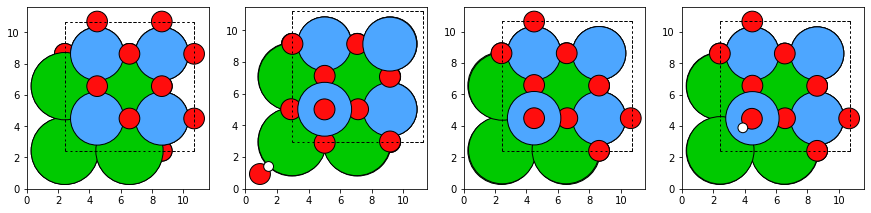

In [106]:
formula = 'BaTaO3'
fig, axarr = plt.subplots(1,4,figsize =(15,5))
plot_atoms(df[df.formula == formula]['struc_bare'].values[0], axarr[0])
plot_atoms(df[df.formula == formula]['struc_OOH'].values[0], axarr[1])
plot_atoms(df[df.formula == formula]['struc_O'].values[0], axarr[2])
plot_atoms(df[df.formula == formula]['struc_OH'].values[0], axarr[3])
#plot_atoms(df['struc_bare'][1], axarr[1,0], rotation = ('90x,90y,180z'))
#plot_atoms(df['struc_OOH'][1], axarr[1,1], rotation = ('90x,90y,180z'))
#plot_atoms(df['struc_O'][1], axarr[1,2], rotation = ('90x,90y,180z'))
#plot_atoms(df['struc_OH'][1], axarr[1,3], rotation = ('90x,90y,180z'))


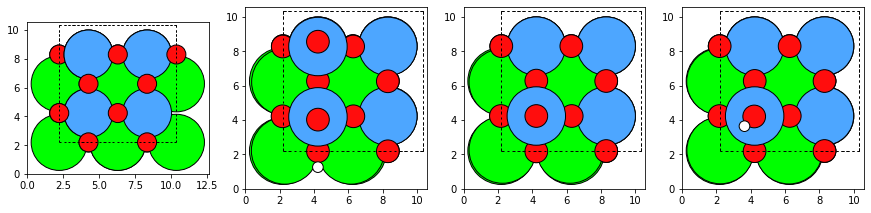

In [108]:
formula = 'SrTaO3'
fig, axarr = plt.subplots(1,4,figsize =(15,5))
plot_atoms(df[df.formula == formula]['struc_bare'].values[0], axarr[0])
plot_atoms(df[df.formula == formula]['struc_OOH'].values[0], axarr[1])
plot_atoms(df[df.formula == formula]['struc_O'].values[0], axarr[2])
plot_atoms(df[df.formula == formula]['struc_OH'].values[0], axarr[3])
#plot_atoms(df['struc_bare'][1], axarr[1,0], rotation = ('90x,90y,180z'))
#plot_atoms(df['struc_OOH'][1], axarr[1,1], rotation = ('90x,90y,180z'))
#plot_atoms(df['struc_O'][1], axarr[1,2], rotation = ('90x,90y,180z'))
#plot_atoms(df['struc_OH'][1], axarr[1,3], rotation = ('90x,90y,180z'))
view(df[df.formula == formula]['struc_OOH'].values[0])

<AxesSubplot:>

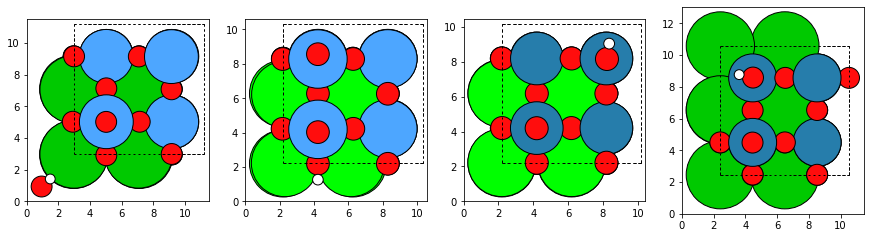

In [122]:
# O + OH dissoc. cases
formula = ['BaTaO3','SrTaO3','SrReO3','BaReO3']
fig, axarr = plt.subplots(1,4,figsize =(15,5))
plot_atoms(df[df.formula == formula[0]]['struc_OOH'].values[0], axarr[0])
plot_atoms(df[df.formula == formula[1]]['struc_OOH'].values[0], axarr[1])
plot_atoms(df[df.formula == formula[2]]['struc_OOH'].values[0], axarr[2])
plot_atoms(df[df.formula == formula[3]]['struc_OOH'].values[0], axarr[3])
#plot_atoms(df['struc_bare'][1], axarr[1,0], rotation = ('90x,90y,180z'))
#plot_atoms(df['struc_OOH'][1], axarr[1,1], rotation = ('90x,90y,180z'))
#plot_atoms(df['struc_O'][1], axarr[1,2], rotation = ('90x,90y,180z'))
#plot_atoms(df['struc_OH'][1], axarr[1,3], rotation = ('90x,90y,180z'))

In [111]:
excluded = ['BaTaO3','SrTaO3','NaTaO3','NaWO3','SrReO3','BaReO3','TlWO3','RbWO3']
# O + OH dissoc. : 'BaTaO3','SrTaO3','SrReO3','BaReO3'
# non-converging : 'NaWO3'
# Reconstruc. : 'TlWO3','RbWO3', 'NaTaO3'

original_count = len(df)

idx_list=[]
for i in range(1,len(df)+1):
    if df['formula'][i] in excluded:
        idx_list.append(i)
df_cleaned = df.drop(idx_list)

str_expr = "(DE_OOH) > 0 & (DE_OH < 3)"
df_cleaned.query(str_expr)

print('Removed %d/%d entries'%(original_count - len(df_cleaned), original_count))

df_cleaned['index'] = df_cleaned.index
df_cleaned.index = range(len(df_cleaned))

df_cleaned

Removed 8/80 entries


,formula,mag_ini,Ehull,convg_bare,tot_E_bare,DE_bare,DG_bare,bare_mag,nsteps_bare,struc_bare,...,struc_O,convg_OH,tot_E_OH,DE_OH,DG_OH,OH_mag,OH_dmag,nsteps_OH,struc_OH,index
0,SrTcO3,FM,0,True,-386.83,0,0,13.642,1,"(Atom('O', [0.0, 1.9802230716140743, 0.0], ind...",...,"(Atom('O', [0.0, 1.9802230716140743, 0.0], ind...",True,-398.741,-1.077,-0.782,10.772,-2.871,104,"(Atom('H', [1.0892480305002905, 2.121999850428...",1
1,BaFeO3,FM,0,True,-316.788,0,0,59.992,1,"(Atom('Ba', [2.0165225, 2.0165225, 2.016522500...",...,"(Atom('Ba', [2.0165225, 2.0165225, 2.016522500...",True,-325.893,1.729,2.024,58.79,-1.202,135,"(Atom('Ba', [2.0165225, 2.0165225, 2.016522500...",2
2,BaMoO3,FM,0,True,-359.32,0,0,24,1,"(Atom('Ba', [2.068112131752645, 2.068112131752...",...,"(Atom('Ba', [2.068112131752645, 2.068112131752...",True,-370.751,-0.597,-0.302,23,-1,74,"(Atom('Ba', [2.068112131752645, 2.068112131752...",3
3,KTaO3,FM,0,True,-438.376,0,0,0,1,"(Atom('K', [2.0142334299130127, 2.014233429913...",...,"(Atom('K', [2.0142334299130127, 2.014233429913...",True,-450.506,-1.296,-1.001,0.991,0.991,67,"(Atom('H', [7.210961006482538, 0.3876880866794...",4
4,BaZrO3,FM,0,True,-438.828,0,0,0,1,"(Atom('Ba', [0.0, 0.0, 2.1180401493166494], in...",...,"(Atom('Ba', [0.0, 0.0, 2.1180401493166494], in...",True,-448.668,0.995,1.29,0.216,0.216,112,"(Atom('Ba', [0.0, 0.0, 2.1180401493166494], in...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,RbReO3,FM,0.146621,True,-381.858,0,0,1.075,1,"(Atom('O', [1.9906822725734121, 0.0, 0.0], ind...",...,"(Atom('O', [1.9906822725734121, 0.0, 0.0], ind...",True,-393.666,-0.973,-0.678,0.637,-0.438,32,"(Atom('H', [1.3831559711460966, 1.383153370338...",74
68,CaRuO3,FM,0.151843,True,-354.261,0,0,25.842,1,"(Atom('Ca', [0.0, 0.0, 1.9592475460467995], in...",...,"(Atom('Ca', [0.0, 0.0, 1.9592475460467995], in...",True,-365.753,-0.658,-0.363,18.609,-7.233,148,"(Atom('Ca', [0.0, 0.0, 1.9592475460467995], in...",75
69,RbPdO3,FM,0.152772,True,-237.862,0,0,24.444,1,"(Atom('O', [0.0, 2.0524346218557206, 0.0], ind...",...,"(Atom('O', [0.0, 2.0524346218557206, 0.0], ind...",True,-247.677,1.018,1.313,22,-2.444,126,"(Atom('H', [0.0821995338326523, 7.297433342242...",76
70,CaHfO3,FM,0.154311,True,-456.965,0,0,-0,1,"(Atom('Ca', [0.0, 0.0, 2.0506531016495875], in...",...,"(Atom('Ca', [0.0, 0.0, 2.0506531016495875], in...",True,-467.476,0.324,0.619,0.059,0.059,148,"(Atom('Ca', [0.0, 0.0, 2.0506531016495875], in...",77


In [112]:
# Scaling relation
model = LinearRegression()

X = df_cleaned.DG_OH.values.reshape(-1,1)
model.fit(X, df_cleaned.DG_OOH)

x_range = np.linspace(X.min(), X.max(), 100)
y1_range = model.predict(x_range.reshape(-1,1))
coeff_OOH = model.coef_
intercept_OOH = model.intercept_

model.fit(X, df_cleaned.DG_O)
y2_range = model.predict(x_range.reshape(-1,1))
coeff_O = model.coef_
intercept_O = model.intercept_


model.fit(X, df_cleaned.DG_OH)
y3_range = model.predict(x_range.reshape(-1,1))
coeff_OH = model.coef_
intercept_OH = model.intercept_

In [113]:
trace1 = go.Scatter(x = df_cleaned['DG_OH'], y = df_cleaned['DG_OOH'], name = 'OOH vs OH',
                    text = df_cleaned['formula'],
                    mode = 'markers', marker = dict(size = 15, symbol = 18))

trace2 = go.Scatter(x = df_cleaned['DG_OH'], y = df_cleaned['DG_O'], name = 'O vs OH',
                    text = df_cleaned['formula'],
                    mode = 'markers', marker = dict(size = 15, symbol = 30,
                                                    color = 'rgb(255,0,0)'))
trace3 = go.Scatter(x = df_cleaned['DG_OH'], y = df_cleaned['DG_OH'], name = 'OH vs OH',
                    text = df_cleaned['formula'],
                    mode = 'markers', marker = dict(size = 15, symbol = 0))

trace4 = go.Scatter(x=x_range, y= y1_range, name = 'OOH_fit',
                    mode = 'lines', marker=dict(color = 'blue'))
trace5 = go.Scatter(x=x_range, y= y2_range, name = 'O_fit',
                    mode = 'lines', marker=dict(color = 'red'))
trace6 = go.Scatter(x=x_range, y= y3_range, name = 'OH_fit',
                    mode = 'lines', marker=dict(color = 'green'))

data = [trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(height = 600, width = 800, title = 'scaling relation',
                   titlefont = dict(size = 25), template= 'seaborn',
                    )

fig = go.Figure(data = data, layout = layout)

fig.update_xaxes(title_text = r'$\Delta G_{\text{OH}} \text{ (eV)}$', titlefont = dict(size = 25),
                 tickfont = dict(size=18),
                   zeroline = False,
                   gridwidth = 1)
fig.update_yaxes(title_text = r'$\Delta G_{\text{X}} \text{ (eV)}$', titlefont = dict(size = 25),
                 tickfont = dict(size=18),
                   zeroline = False,
                   gridwidth = 1)
annotations = []
annotations.append(dict(x=2, y= 1,
                        text = r'$\Delta G_{\text{OOH}} = \text{%4.3f} \Delta G_{\text{OH}} + \text{%4.3f}$'
                               % (coeff_OOH, intercept_OOH),
                        xshift = 50, yshift = -80,
                        font = dict(size = 20, color = 'blue')))
annotations.append(dict(x=2, y= 0.5, text = r'$\Delta G_{\text{O}} = \text{%4.3f} \Delta G_{\text{OH}} + \text{%4.3f}$'
                                          % (coeff_O, intercept_O),
                        xshift = 50, yshift = -90,
                        font = dict(size = 20, color = 'red')))

annotations.append(dict(x=2, y= 0, text = r'$\Delta G_{\text{OH}} = \text{%4.3f} \Delta G_{\text{OH}} + \text{%4.3f}$'
                                          % (coeff_OH, intercept_OH),
                        xshift = 50, yshift = -100,
                        font = dict(size = 20, color = 'green')))

fig.update_layout(annotations = annotations)

# plot(fig, auto_open = True, filename = 'plots/scaling_relations.html', include_mathjax='cdn')
fig.show()
# py.iplot(fig)

<div>
    <a href="https://plotly.com/~gwanyeong/50/?share_key=atBCZhDkY1Yq1lCjq3nrsN" target="_blank" title="scaling_relations_v2" style="display: block; text-align: center;"><img src="https://plotly.com/~gwanyeong/50.png?share_key=atBCZhDkY1Yq1lCjq3nrsN" alt="scaling_relations_v2" style="max-width: 100%;width: 800px;"  width="800" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="gwanyeong:50" sharekey-plotly="atBCZhDkY1Yq1lCjq3nrsN" src="https://plotly.com/embed.js" async></script>
</div>


In [114]:
fig = make_subplots(rows = 80, cols = 1, shared_xaxes = True,
                   subplot_titles=tuple(df['formula']), column_titles = tuple(df['formula']),
                  # vertical_spacing = 0.01
                   )

x_list = [0,1,1,2,2,3,3,4,4,5]
y_idx = [0,0,1,1,2,2,3,3,4,4]

for idx in range(1,81):
    ads_list= [0, df.loc[idx,'DE_OH'], df.loc[idx,'DE_O'], df.loc[idx,'DE_OOH'], 4.92]
    
    y_list = []
    for x in range(len(x_list)):
      #  print(x_list[x]," ",ads_list[y_idx[x]])
        y_list.append(ads_list[y_idx[x]])

    fig.append_trace(go.Scatter(x = x_list, y = y_list, name = df.loc[idx,'formula'],
                               text = ['', 'H2O','','OH*','','O*','','OOH*','','O2(g)'],
                               textposition = "bottom center",
                               mode = 'lines+text'), row = idx, col = 1)
    fig.update_yaxes(title_text = 'DG (eV)')
    layout = go.Layout(title = 'free energy diagram', titlefont = dict(size = 25), autosize = True, 
                          )

fig.update_layout(title_text = 'free_energy_diagram', showlegend = True, height = 15000, width = 500 )
# pyo.iplot(fig)
fig.show()


In [115]:
fig = make_subplots(rows = 1, cols = 1)

x_list = [0,1,1,2,2,3,3,4,4,5]
y_idx = [0,0,1,1,2,2,3,3,4,4]

for idx in range(len(df_cleaned)):
    ads_list= [0, df_cleaned['DG_OH'][idx], df_cleaned['DG_O'][idx], df_cleaned['DG_OOH'][idx], 4.92]
    
    y_list = []
    for x in range(len(x_list)):
  #  print(x_list[x]," ",ads_list[y_idx[x]])
        y_list.append(ads_list[y_idx[x]])

    fig.add_trace(go.Scatter(x = x_list, y = y_list, name = df_cleaned['formula'][idx]), row = 1, col = 1) # visible='legendonly'
    layout = go.Layout(title = 'free energy diagram', titlefont = dict(size = 25))
    fig.update_xaxes(title_text = 'Reaction Coordinate', titlefont = dict(size = 25))
    fig.update_yaxes(title_text = 'DG_eV', titlefont = dict(size = 25))
    fig.update_layout(height = 600, width = 800, title_text = '<b>Free energy diagram',
                     legend=dict(yanchor = "top", y = 0.95),template = 'seaborn')
# pyo.iplot(fig)
fig.show()

In [116]:
# Add 4e- WOR data

df_cleaned['DG1'] = df_cleaned.DG_OH
df_cleaned['DG2'] = df_cleaned.DG_O - df_cleaned.DG_OH
df_cleaned['DG3'] = df_cleaned.DG_OOH - df_cleaned.DG_O
df_cleaned['DG4'] = 4.92 - df_cleaned.DG_OOH

UL_ORR_list = []
UL_list = []
for idx in range(len(df_cleaned)):
    UL = max(df_cleaned['DG1'][idx],df_cleaned['DG2'][idx], df_cleaned['DG3'][idx], df_cleaned['DG4'][idx]) 
    UL_list.append(UL)
    UL_ORR = min(df_cleaned['DG1'][idx],df_cleaned['DG2'][idx], df_cleaned['DG3'][idx], df_cleaned['DG4'][idx]) 
    UL_ORR_list.append(UL_ORR)
    
df_cleaned['UL_4e'] = UL_list
df_cleaned['UL_ORR'] = UL_ORR_list

In [117]:
df_cleaned['DG1_2e'] = df_cleaned.DG_OH
df_cleaned['DG2_2e'] = -df_cleaned.DG_OH + 1.76*2
df_cleaned['OP_2e'] = abs(df_cleaned['DG_OH'] - 1.76) 
df_cleaned['UL_2e'] = abs(df_cleaned['DG_OH'] - 1.76) + 1.76

In [118]:
df_cleaned

,formula,mag_ini,Ehull,convg_bare,tot_E_bare,DE_bare,DG_bare,bare_mag,nsteps_bare,struc_bare,...,DG1,DG2,DG3,DG4,UL_4e,UL_ORR,DG1_2e,DG2_2e,OP_2e,UL_2e
0,SrTcO3,FM,0,True,-386.83,0,0,13.642,1,"(Atom('O', [0.0, 1.9802230716140743, 0.0], ind...",...,-0.782,0.075,3.188,2.439,3.188,-0.782,-0.782,4.302,2.542,4.302
1,BaFeO3,FM,0,True,-316.788,0,0,59.992,1,"(Atom('Ba', [2.0165225, 2.0165225, 2.016522500...",...,2.024,2.428,0.465,0.003,2.428,0.003,2.024,1.496,0.264,2.024
2,BaMoO3,FM,0,True,-359.32,0,0,24,1,"(Atom('Ba', [2.068112131752645, 2.068112131752...",...,-0.302,-0.551,3.872,1.901,3.872,-0.551,-0.302,3.822,2.062,3.822
3,KTaO3,FM,0,True,-438.376,0,0,0,1,"(Atom('K', [2.0142334299130127, 2.014233429913...",...,-1.001,0.387,3.189,2.345,3.189,-1.001,-1.001,4.521,2.761,4.521
4,BaZrO3,FM,0,True,-438.828,0,0,0,1,"(Atom('Ba', [0.0, 0.0, 2.1180401493166494], in...",...,1.29,2.853,0.563,0.214,2.853,0.214,1.29,2.23,0.47,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,RbReO3,FM,0.146621,True,-381.858,0,0,1.075,1,"(Atom('O', [1.9906822725734121, 0.0, 0.0], ind...",...,-0.678,0.186,3.073,2.339,3.073,-0.678,-0.678,4.198,2.438,4.198
68,CaRuO3,FM,0.151843,True,-354.261,0,0,25.842,1,"(Atom('Ca', [0.0, 0.0, 1.9592475460467995], in...",...,-0.363,1.043,1.834,2.406,2.406,-0.363,-0.363,3.883,2.123,3.883
69,RbPdO3,FM,0.152772,True,-237.862,0,0,24.444,1,"(Atom('O', [0.0, 2.0524346218557206, 0.0], ind...",...,1.313,1.87,1.048,0.689,1.870,0.689,1.313,2.207,0.447,2.207
70,CaHfO3,FM,0.154311,True,-456.965,0,0,-0,1,"(Atom('Ca', [0.0, 0.0, 2.0506531016495875], in...",...,0.619,3.023,0.218,1.06,3.023,0.218,0.619,2.901,1.141,2.901


In [119]:
df_cleaned.columns

Index(['formula', 'mag_ini', 'Ehull', 'convg_bare', 'tot_E_bare', 'DE_bare',
       'DG_bare', 'bare_mag', 'nsteps_bare', 'struc_bare', 'convg_OOH',
       'tot_E_OOH', 'DE_OOH', 'DG_OOH', 'OOH_mag', 'OOH_dmag', 'nsteps_OOH',
       'struc_OOH', 'convg_O', 'tot_E_O', 'DE_O', 'DG_O', 'O_mag', 'O_dmag',
       'nsteps_O', 'struc_O', 'convg_OH', 'tot_E_OH', 'DE_OH', 'DG_OH',
       'OH_mag', 'OH_dmag', 'nsteps_OH', 'struc_OH', 'index', 'DG1', 'DG2',
       'DG3', 'DG4', 'UL_4e', 'UL_ORR', 'DG1_2e', 'DG2_2e', 'OP_2e', 'UL_2e'],
      dtype='object')

In [120]:
# Activity plot (combined)- based on 2e-

# linear regression for 4e- WOR
model_DG2 = LinearRegression()
X = df_cleaned.DG_OH.values.reshape(-1,1)
model_DG2.fit(X, df_cleaned.DG2)

x_range = np.linspace(X.min(), X.max(), 100)
y1_range = model_DG2.predict(x_range.reshape(-1,1))
(coef_DG2, intercept_DG2) = (model_DG2.coef_, model_DG2.intercept_)

model_DG3 = LinearRegression()
model_DG3.fit(X, df_cleaned.DG3)

x_range = np.linspace(X.min(), X.max(), 100)
y2_range = model_DG3.predict(x_range.reshape(-1,1))
(coef_DG3, intercept_DG3) = (model_DG3.coef_, model_DG3.intercept_)

# get volcano peak
x_peak = - (intercept_DG2 - intercept_DG3) / (coef_DG2 - coef_DG3)
y_peak = model_DG2.predict(x_peak.reshape(-1,1))


# revise x,y range for each region
x1_range = np.linspace(x_peak[0], X.max(), 100)
x2_range = np.linspace(X.min(), x_peak[0], 100)

y1_range = model_DG2.predict(x1_range.reshape(-1,1))
y2_range = model_DG3.predict(x2_range.reshape(-1,1))



# linear regression for 2e- WOR
model_DG1_2e = LinearRegression()
# X = df_cleaned.DG_OH.values.reshape(-1,1)
model_DG1_2e.fit(X, df_cleaned.DG1_2e)

x3_range = np.linspace(1.76, X.max(), 100)
y3_range = model_DG1_2e.predict(x3_range.reshape(-1,1))
(coef_DG1_2e, intercept_DG1_2e) = (model_DG1_2e.coef_, model_DG1_2e.intercept_)


model_DG2_2e = LinearRegression()
model_DG2_2e.fit(X, df_cleaned.DG2_2e)

x4_range = np.linspace(X.min(), 1.76, 100)
y4_range = model_DG2_2e.predict(x4_range.reshape(-1,1))
(coef_DG2_2e, intercept_DG2_2e) = (model_DG2_2e.coef_, model_DG2_2e.intercept_)
print(coef_DG1_2e, intercept_DG1_2e, coef_DG2_2e, intercept_DG2_2e)


# get plot
layout = go.Layout(height = 600, width = 600, # title = 'activity plot',
                   titlefont = dict(size = 25),
                   showlegend = True,
              #     plot_bgcolor = 'yellow'
              #     hovermode = 'closest'
                   )

trace_2e = go.Scatter(x = df_cleaned['DG_OH'], y = df_cleaned['UL_2e'], name = '2e-', text= df_cleaned['formula'],
                   textposition = 'top left', 
                    mode = 'markers', marker = dict(size = 15, symbol = 0), marker_color = df_cleaned['Ehull'],) 

trace_4e = go.Scatter(x = df_cleaned['DG_OH'], y = df_cleaned['UL_4e'], name = '4e-', text= df_cleaned['formula'],
                   textposition = 'top left',
                    mode = 'markers', marker = dict(size = 15, symbol = 0), marker_color = df_cleaned['Ehull'],)

trace1 = go.Scatter(x=x1_range, y= y1_range, name = r'$\Delta G_{\text{2}} \text{ (4e-)}$',
                    mode = 'lines', marker=dict(color = 'green'))

trace2 = go.Scatter(x=x2_range, y= y2_range, name = r'$\Delta G_{\text{3}} \text{ (4e-)}$',
                    mode = 'lines', marker=dict(color = 'red'))

trace3 = go.Scatter(x=x3_range, y= y3_range, name = r'$\Delta G_{\text{1}} \text{ (2e-)}$',
                    mode = 'lines', marker=dict(color = 'blue'))

trace4 = go.Scatter(x=x4_range, y= y4_range, name = r'$\Delta G_{\text{2}} \text{ (2e-)}$',
                    mode = 'lines', marker=dict(color = 'black'))

data = [trace_2e, trace1, trace2, trace3, trace4] # trace_4e

fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(title_text = r'$\Delta G_{\text{OH}} \text{ (eV)}$', 
                                       titlefont = dict(size = 30),
                 tickfont = dict(size=18),
                   zeroline = False,
                   gridwidth = 1)
fig.update_yaxes(title_text =  r'$ U_{\text{L}} \text{ (V)}$', titlefont = dict(size = 30),
                 tickfont = dict(size=18),
                   zeroline = False,
                   gridwidth = 1)

# plot(fig, filename = 'plots/activity_plot_combined_v2.html', include_mathjax='cdn')
fig.show()
# py.iplot(fig)

[1.] 3.3306690738754696e-16 [-1.] 3.519999999999999


<div>
    <a href="https://plotly.com/~gwanyeong/56/?share_key=8KdNpTYBAzqzycaNgFjEwJ" target="_blank" title="activity_plot_201020" style="display: block; text-align: center;"><img src="https://plotly.com/~gwanyeong/56.png?share_key=8KdNpTYBAzqzycaNgFjEwJ" alt="activity_plot_201020" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plotly.com/404.png';" /></a>
    <script data-plotly="gwanyeong:56" sharekey-plotly="8KdNpTYBAzqzycaNgFjEwJ" src="https://plotly.com/embed.js" async></script>
</div>
